<a href="https://colab.research.google.com/github/federicoding/TrainingGeneral/blob/main/Regression_rapide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

L'idée de ce fichier est d'être, à la fois un **entrainement** et une **fiche technique** pour faire rapidement (limite *quick & dirty*) un modèle de régression.

#Boston House Prices

#Méthode fast & bourrin

*I.e.* sans prévisualisation

In [4]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.datasets import load_boston

In [6]:
bt = load_boston()
housing = pd.DataFrame(data = bt.data, columns = bt.feature_names)
housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [7]:
housing['Price'] = bt.target
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


On va définir la cible (et l'enlever du **X**) et commencer à split le `DataFrame`

In [25]:
from sklearn.model_selection import train_test_split

X = housing.drop('Price', axis=1)
Y = housing.Price

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

On importe la classe de régression linéaire

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

On *entraine* **lm** sur **X_train** et **Y_train**

In [27]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Affichage de l'intercept estimé:

In [14]:
print("L'Intercept estimé est :", lm.intercept_)

L'Intercept estimé est : 37.9124870097502


Affichage d'un `DataFrame` contenant chaque variable explicative et son coefficient estimé par le modéle associé:

In [15]:
pd.DataFrame({'coefficients estimés': lm.coef_}, index= X_train.columns)

,coefficients estimés
CRIM,-0.130800
ZN,0.049403
INDUS,0.001095
CHAS,2.705366
NOX,-15.957050
RM,3.413973
AGE,0.001119
DIS,-1.493081
RAD,0.364422
TAX,-0.013172


Petit nuage de points pour voir la relation RM et PRICE

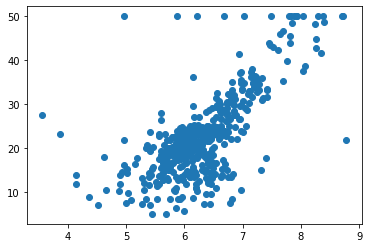

In [16]:
plt.scatter(housing.RM, housing.Price)

*  calcul et affichage (des 5 première valeurs) pour **X_test**
*   Comparaison d'avec les 5 premières valeurs de **Y_test**

In [18]:
print(pd.DataFrame((lm.predict(X_test)[:5],Y_test[:5])))

           0          1          2          3          4
0  37.563118  32.144451  27.065736   5.670806  35.099826
1  37.600000  27.900000  22.600000  13.800000  35.200000


Graphiquement on vérifie le modèle. Tout simplement on mets en vis-à-vis les Y_test et les Y_pred et on rajoute la droite d'équation **y=x**

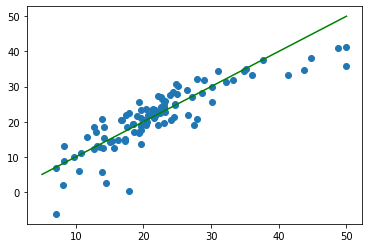

In [19]:
plt.scatter(Y_test, lm.predict(X_test))
x = np.linspace(5,50)
plt.plot(x,x,'g')

La méthode **lm.score** permet de calculer le coefficient de détermination **R²**, compris entre 0 et 1. Le plus proche de 1 étant le mieux pour le pouvoir prédictif du modèle

In [22]:
lm.score(X_test,Y_test)

0.7334492147453086

Pour la sacro-sainte **mean squared error** il faut passer par un module **sklearn.metrics**

Plus elle est proche de **zéro**, meilleures sont les prédictions.

In [23]:
from sklearn.metrics import mean_squared_error

print('Erreur quadratique moyenne: ', mean_squared_error(Y_test, lm.predict(X_test)))

Erreur quadratique moyenne:  20.869292183770735


Modèlisation via **régression Lasso**

Il faut importer la classe. On crée une régression avec constante de régulatisation `alpha = 0.3`

In [24]:
from sklearn.linear_model import Lasso

rl = Lasso(alpha = 0.3)

In [25]:
#on entraine le modèle

rl.fit(X_train,Y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Affichage du `DataFrame` variables explicatives et coefficients associés

In [27]:
pd.DataFrame({'coefficients estimés': rl.coef_}, index = X_train.columns)

,coefficients estimés
CRIM,-0.114418
ZN,0.055058
INDUS,-0.018492
CHAS,0.000000
NOX,-0.000000
RM,2.596070
AGE,0.001830
DIS,-1.077792
RAD,0.342547
TAX,-0.016097


Comparaison, *useless* des deux modèles

In [29]:
print("Prédictions : ", rl.predict(X_test)[0:5])
print("Prédictions : ", lm.predict(X_test)[0:5])
print("Valeurs réelles : ",  list(Y_test[0:5]))

Prédictions :  [36.39914787 32.21115005 26.69827134  4.60390244 31.59396488]
Prédictions :  [37.56311787 32.14445143 27.06573629  5.67080633 35.09982577]
Valeurs réelles :  [37.6, 27.9, 22.6, 13.8, 35.2]


Affichage du **coefficient de détermination** et de **l'erreur quadratique moyenne** des prédictions

In [30]:
print("Coefficient de détermination: ", rl.score(X_test, Y_test)) 
print("Erreur quadratique : ", mean_squared_error(Y_test ,rl.predict(X_test)))

Coefficient de détermination:  0.6886679452379977
Erreur quadratique :  24.37539101899


#Method moins bourrine

Avec prévisualisation donc...


Big Scatter plot

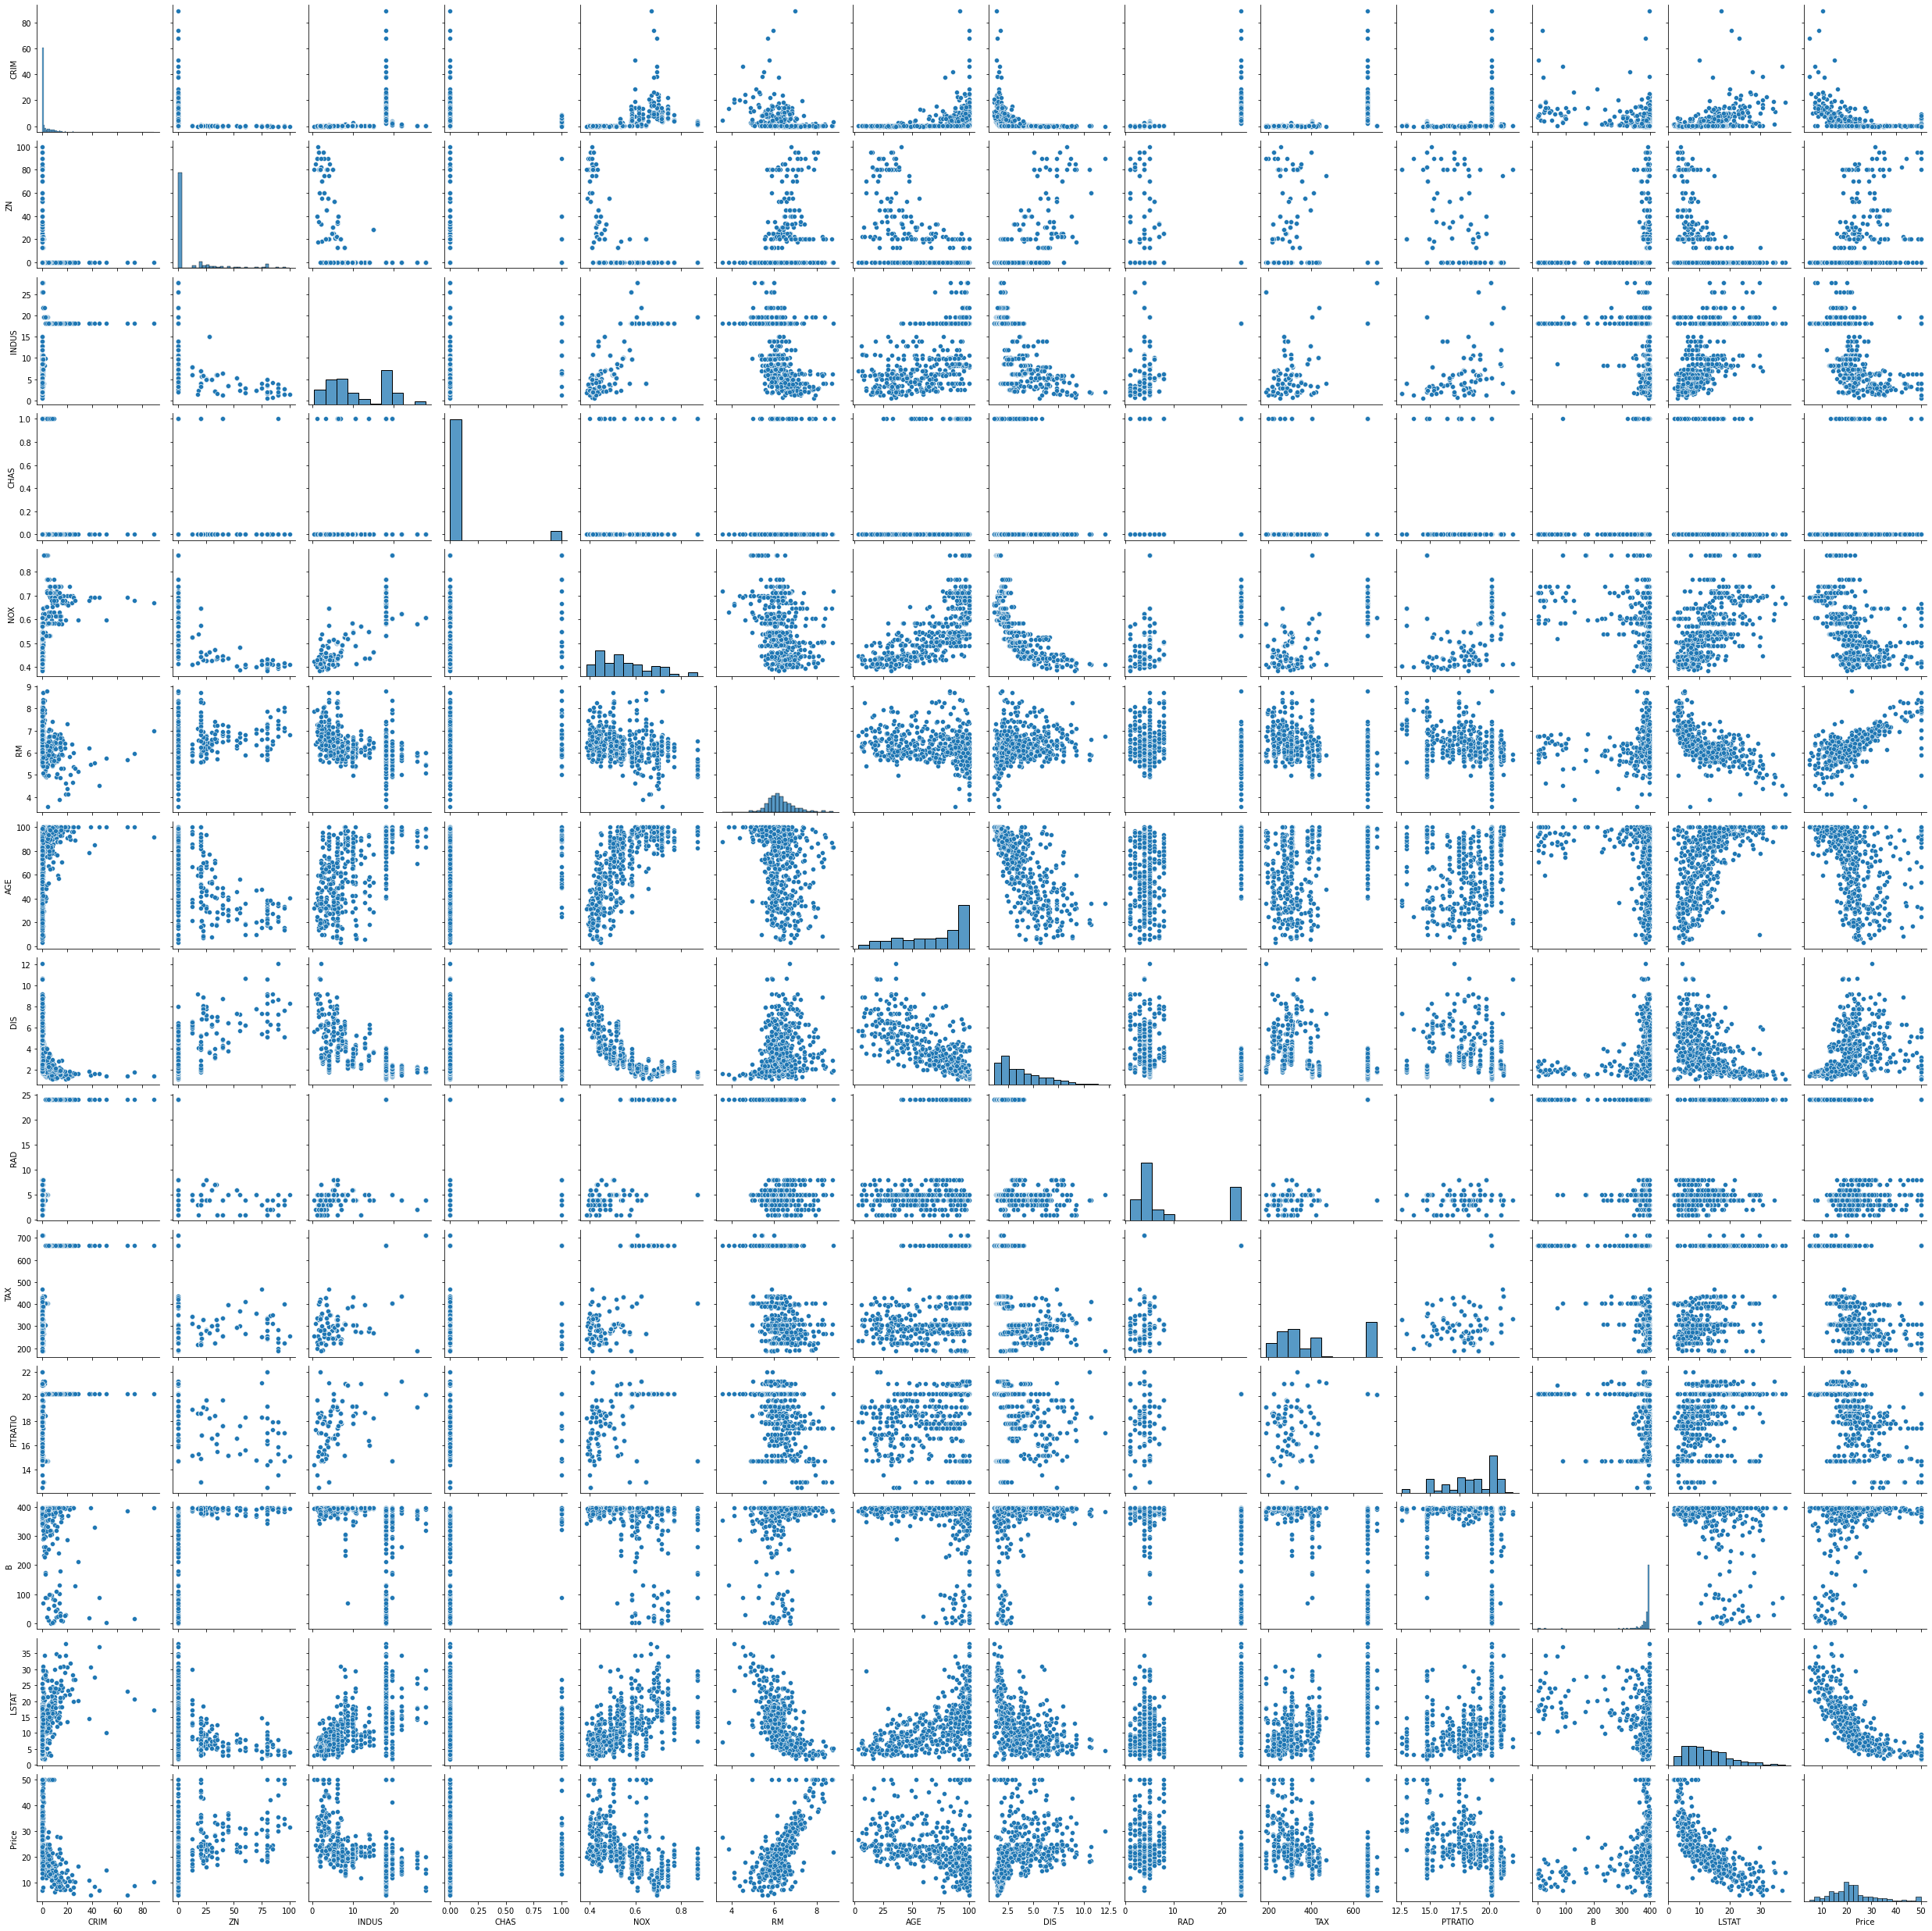

In [8]:
sns.pairplot(housing)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

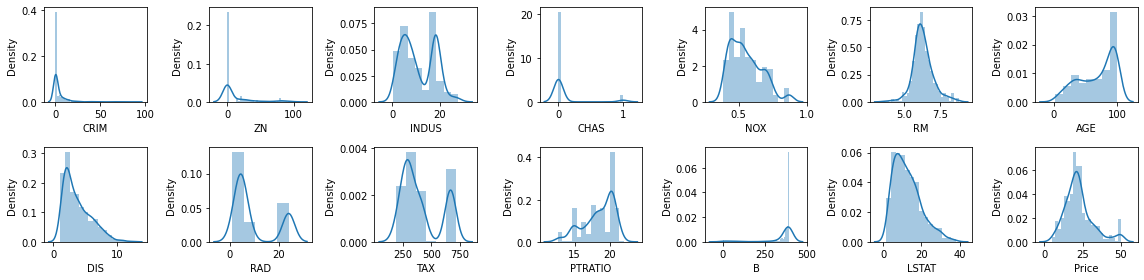

In [9]:
rows = 2
cols = 7

fig, ax = plt.subplots(nrows = rows , ncols = cols , figsize = (16,4))

col = housing.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(housing[col[index]], ax = ax[i][j])
        index +=1 
plt.tight_layout()

On regarde la matrice des correlations pour quantifier et résumer les relations entre les variables.

La matrice des corrélations est proche de celle des covariances (en fait c'en est une version rescalée d'après des variables standardisées).

In [11]:
corrdat = housing.corr()
corrdat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


On zieute via un heatmap pour voir plus facilement

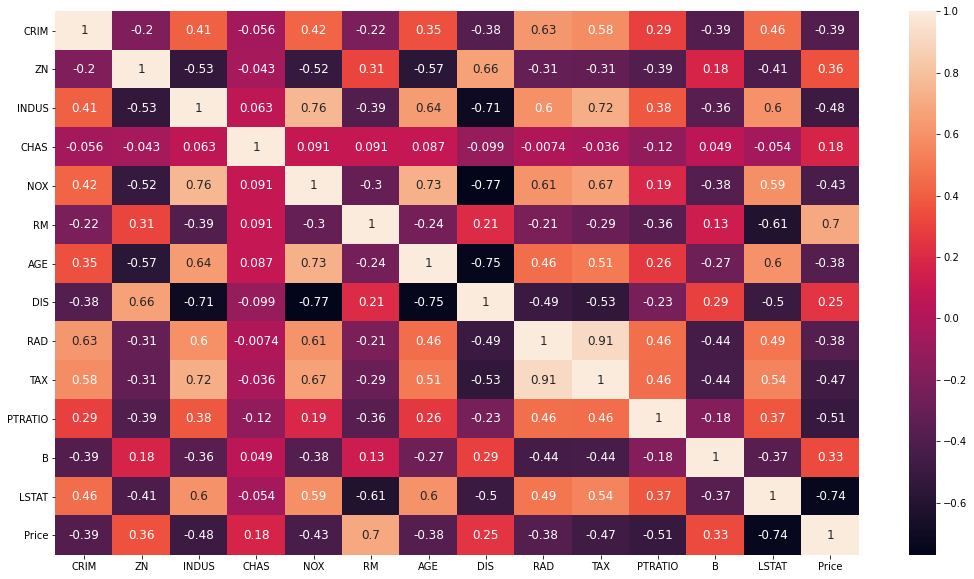

In [13]:
fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(corrdat, annot= True, annot_kws= {'size':12})

Les différentes dimensions de la corrélation

In [14]:
corrdat.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

Pour fit un modèle de régression linéaire on va choisir les features qui ont une correlation haute avec notre variable cible `Price`.

On utilise pour cela une fonction définie comme suit, qui va comparer les valeurs absolues des corrélations avec un seuil

In [15]:
def getCorrelatedFeature(Corrdata, threshold):
  feature = []
  value = []

  for i, index in enumerate(Corrdata.index):
    if abs(Corrdata[index])>threshold:
      feature.append(index)
      print(index)
      value.append(Corrdata[index])
  df = pd.DataFrame(data = value, index = feature, columns = ['corr value'])
  return df

In [16]:
threshold = 0.4
corr_value = getCorrelatedFeature(corrdat['Price'],threshold)

INDUS
NOX
RM
TAX
PTRATIO
LSTAT
Price


In [17]:
corr_value

,corr value
INDUS,-0.483725
NOX,-0.427321
RM,0.695360
TAX,-0.468536
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [18]:
CD = housing[corr_value.index]
CD.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,Price
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


On fait des Pairplot et Corrmat des données corrélées

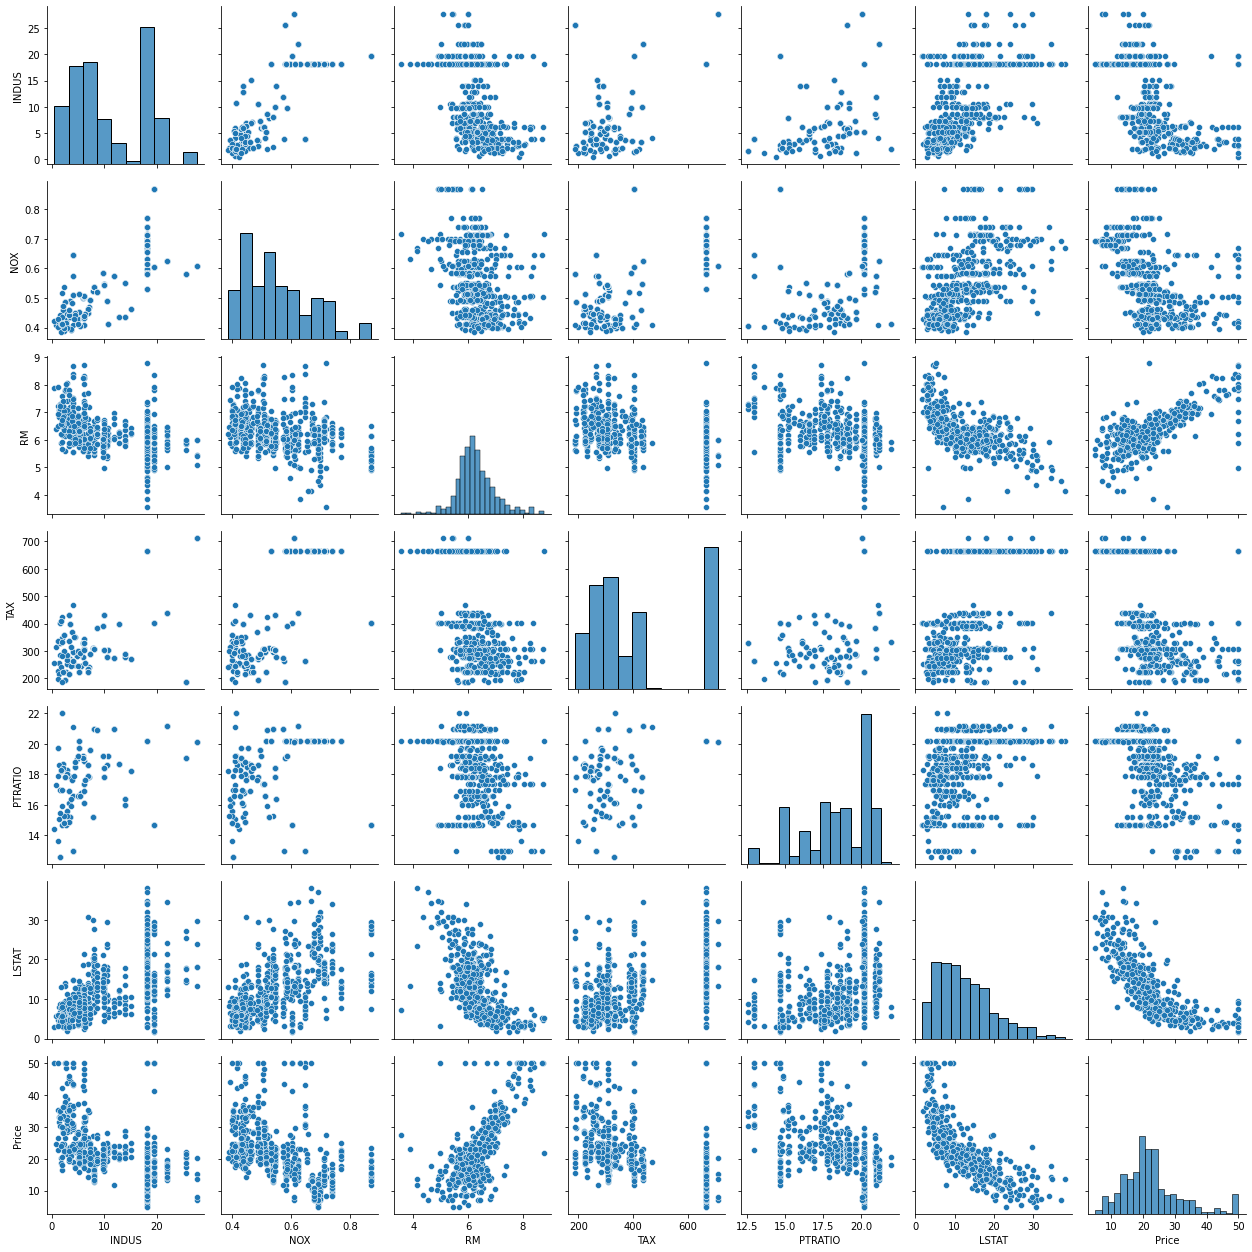

In [19]:
sns.pairplot(CD)
plt.tight_layout()

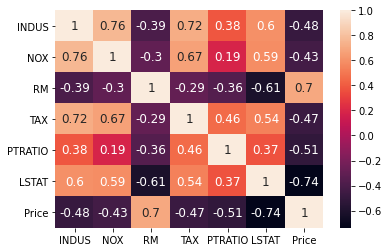

In [23]:
sns.heatmap(CD.corr(), annot = True, annot_kws = {'size':12})

#Nota Bene sur le métriques d'erreur:

**MAE** c'est la Mean Absolute Error, c'est la moyenne de la valeur absolue des erreurs

**MSE** Mean Squared Error, c'est la moyenne des erreurs au carré

**RMSE** Root Mean Squared Error c'est la racine carrée de la moyenne des erreurs au carré.

Ce qu'il faut retenir c'est le suivant:

*   MAE est la plus facile à comprendre, c'est l'erreur moyenne

*   MSE est plus populaire car elle "punit" les erreurs trop grandes (ce qui est souvent utile *in the real world*)

*   RMSE est encore plus populaire car elle est interprétable en **unités de y**.

Ce sont toutes des loss functions car on veut les minimiser.

Pour aller les chercher et les utiliser:

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

au passage on se fait un petit predict

In [28]:
predict = lm.predict(X_test)

In [29]:
score = r2_score(Y_test, predict)
mae = mean_absolute_error(Y_test, predict)
mse = mean_squared_error(Y_test, predict)
rmse = np.sqrt(mean_squared_error(Y_test, predict))

In [30]:
print("The performance for testing set")
print("-------------------------------")
print('r2_score is', score)
print('MAE is ', mae)
print('MSE is ', mse)
print('RMSE is ',rmse)

The performance for testing set
-------------------------------
r2_score is 0.7334492147453086
MAE is  3.2132704958423783
MSE is  20.869292183770735
RMSE is  4.5682920423032
